## Analysis and Visualization

In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore') # for ignoring the warnings

### Loading Data

In [2]:
# Load cleaned data
data = pd.read_csv(r"C:\Users\sukhd\OneDrive\Desktop\Summer Training\Python\Walmart data\walmart_cleaned_dataset.csv")
data.head(2)

,invoice_id,Branch,City,category,unit_price,quantity,payment_method,rating,profit_margin,total_amount,datetime
0,2,WALM048,Harlingen,Electronic accessories,15.28,5.0,Cash,9.6,0.48,76.40,2008-03-19 10:29:00
1,9,WALM066,Grapevine,Health and beauty,36.26,2.0,Credit card,7.2,0.33,72.52,2010-01-19 17:15:00


In [3]:
# Creating backup
df = data.copy()

# Exploring data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9473 entries, 0 to 9472
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   invoice_id      9473 non-null   int64  
 1   Branch          9473 non-null   object 
 2   City            9473 non-null   object 
 3   category        9473 non-null   object 
 4   unit_price      9473 non-null   float64
 5   quantity        9473 non-null   float64
 6   payment_method  9473 non-null   object 
 7   rating          9473 non-null   float64
 8   profit_margin   9473 non-null   float64
 9   total_amount    9473 non-null   float64
 10  datetime        9473 non-null   object 
dtypes: float64(5), int64(1), object(5)
memory usage: 814.2+ KB


In [4]:
# Converting "datetime" to datetime type
df['datetime'] = pd.to_datetime(df['datetime'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9473 entries, 0 to 9472
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   invoice_id      9473 non-null   int64         
 1   Branch          9473 non-null   object        
 2   City            9473 non-null   object        
 3   category        9473 non-null   object        
 4   unit_price      9473 non-null   float64       
 5   quantity        9473 non-null   float64       
 6   payment_method  9473 non-null   object        
 7   rating          9473 non-null   float64       
 8   profit_margin   9473 non-null   float64       
 9   total_amount    9473 non-null   float64       
 10  datetime        9473 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(5), int64(1), object(4)
memory usage: 814.2+ KB


#### **NOTE:** 
"datetime" has to be changed again to datetime type because when csv file is loaded,
pandas infers numeric columns as numeric but datetime type column as object.

### Trend Analysis

#### Revenue trends across branches and categories.

In [5]:
# Data for revenue trends
branch_category_revenue = df.pivot_table(
    values='total_amount', # column(in dataset) where aggregation is applied
    index='Branch',        # rows
    columns='category',    # columns
    aggfunc='sum'          # aggregation function
)
# pivot_table() is advanced version of groupby()
# It creates a matrix for heatmap plotting
branch_category_revenue.head()

category,Electronic accessories,Fashion accessories,Food and beverages,Health and beauty,Home and lifestyle,Sports and travel
Branch,,,,,,
WALM001,234.93,2920.68,NaN,NaN,4042.96,42.85
WALM002,279.64,2629.00,287.73,NaN,3108.09,NaN
WALM003,1884.75,8369.00,253.18,NaN,8497.68,129.66
WALM004,NaN,2952.00,158.25,222.00,2954.12,NaN
WALM005,229.96,3154.00,550.20,104.85,3955.32,NaN


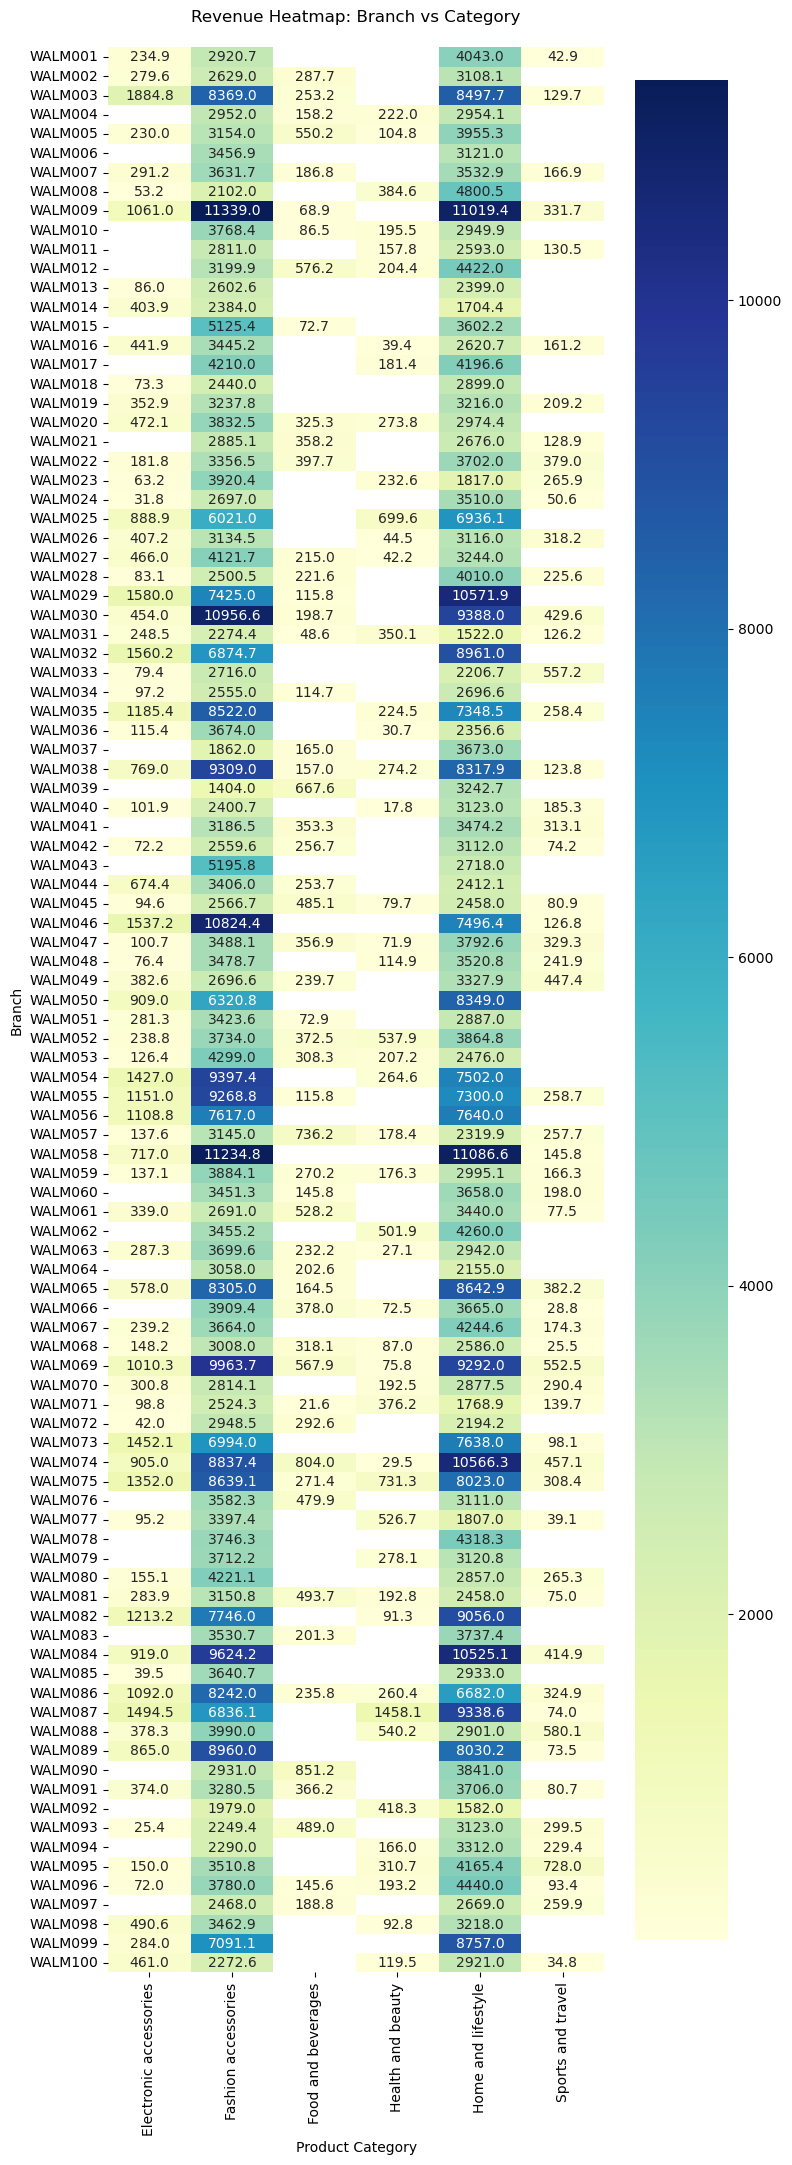

In [6]:
fig, ax = plt.subplots(1,1, figsize=(8, 25))
sns.heatmap(branch_category_revenue, annot = True, fmt = ".1f", cmap = 'YlGnBu', ax = ax)
plt.title("Revenue Heatmap: Branch vs Category\n")
plt.xlabel("Product Category")
plt.ylabel("Branch")
plt.show()

#### Best-selling product categories

In [7]:
# Data for best-selling categories
best_selling_categories = df.groupby('category')['quantity'].sum().reset_index().sort_values('quantity', ascending = False)
best_selling_categories.head(2)

,category,quantity
1,Fashion accessories,9026.0
4,Home and lifestyle,8932.0


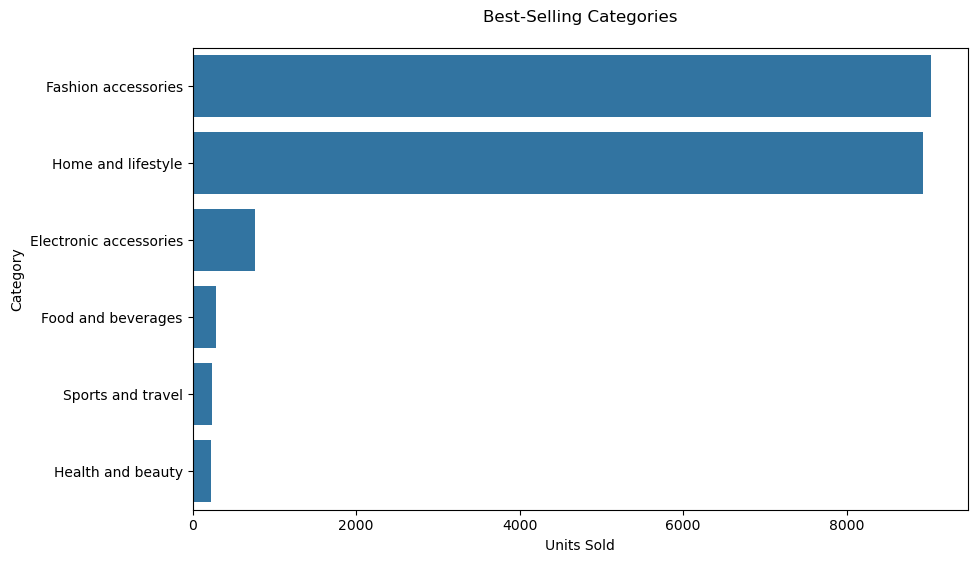

In [8]:
fig, ax = plt.subplots(1,1, figsize=(10, 6))
sns.barplot(data = best_selling_categories, x = 'quantity', y = 'category')
plt.title("Best-Selling Categories\n")
plt.xlabel("Units Sold")
plt.ylabel("Category")
plt.show()

#### Sales performance by time, city and, payment method

In [9]:
# Sales peformance data by city
city_sales_perform = df.groupby('City')['total_amount'].sum().reset_index().sort_values('total_amount', ascending = False)
city_sales_perform.head(2)

,City,total_amount
97,Weslaco,39705.76
95,Waxahachie,37295.49


In [10]:
city_sales_perform['City'].size

98

In [11]:
# Creating batches as data is large for ploting
city_sales_perform_batch1 = city_sales_perform.iloc[:50] # Top 50 cities
city_sales_perform_batch2 = city_sales_perform.iloc[50:] # 51-100 cities

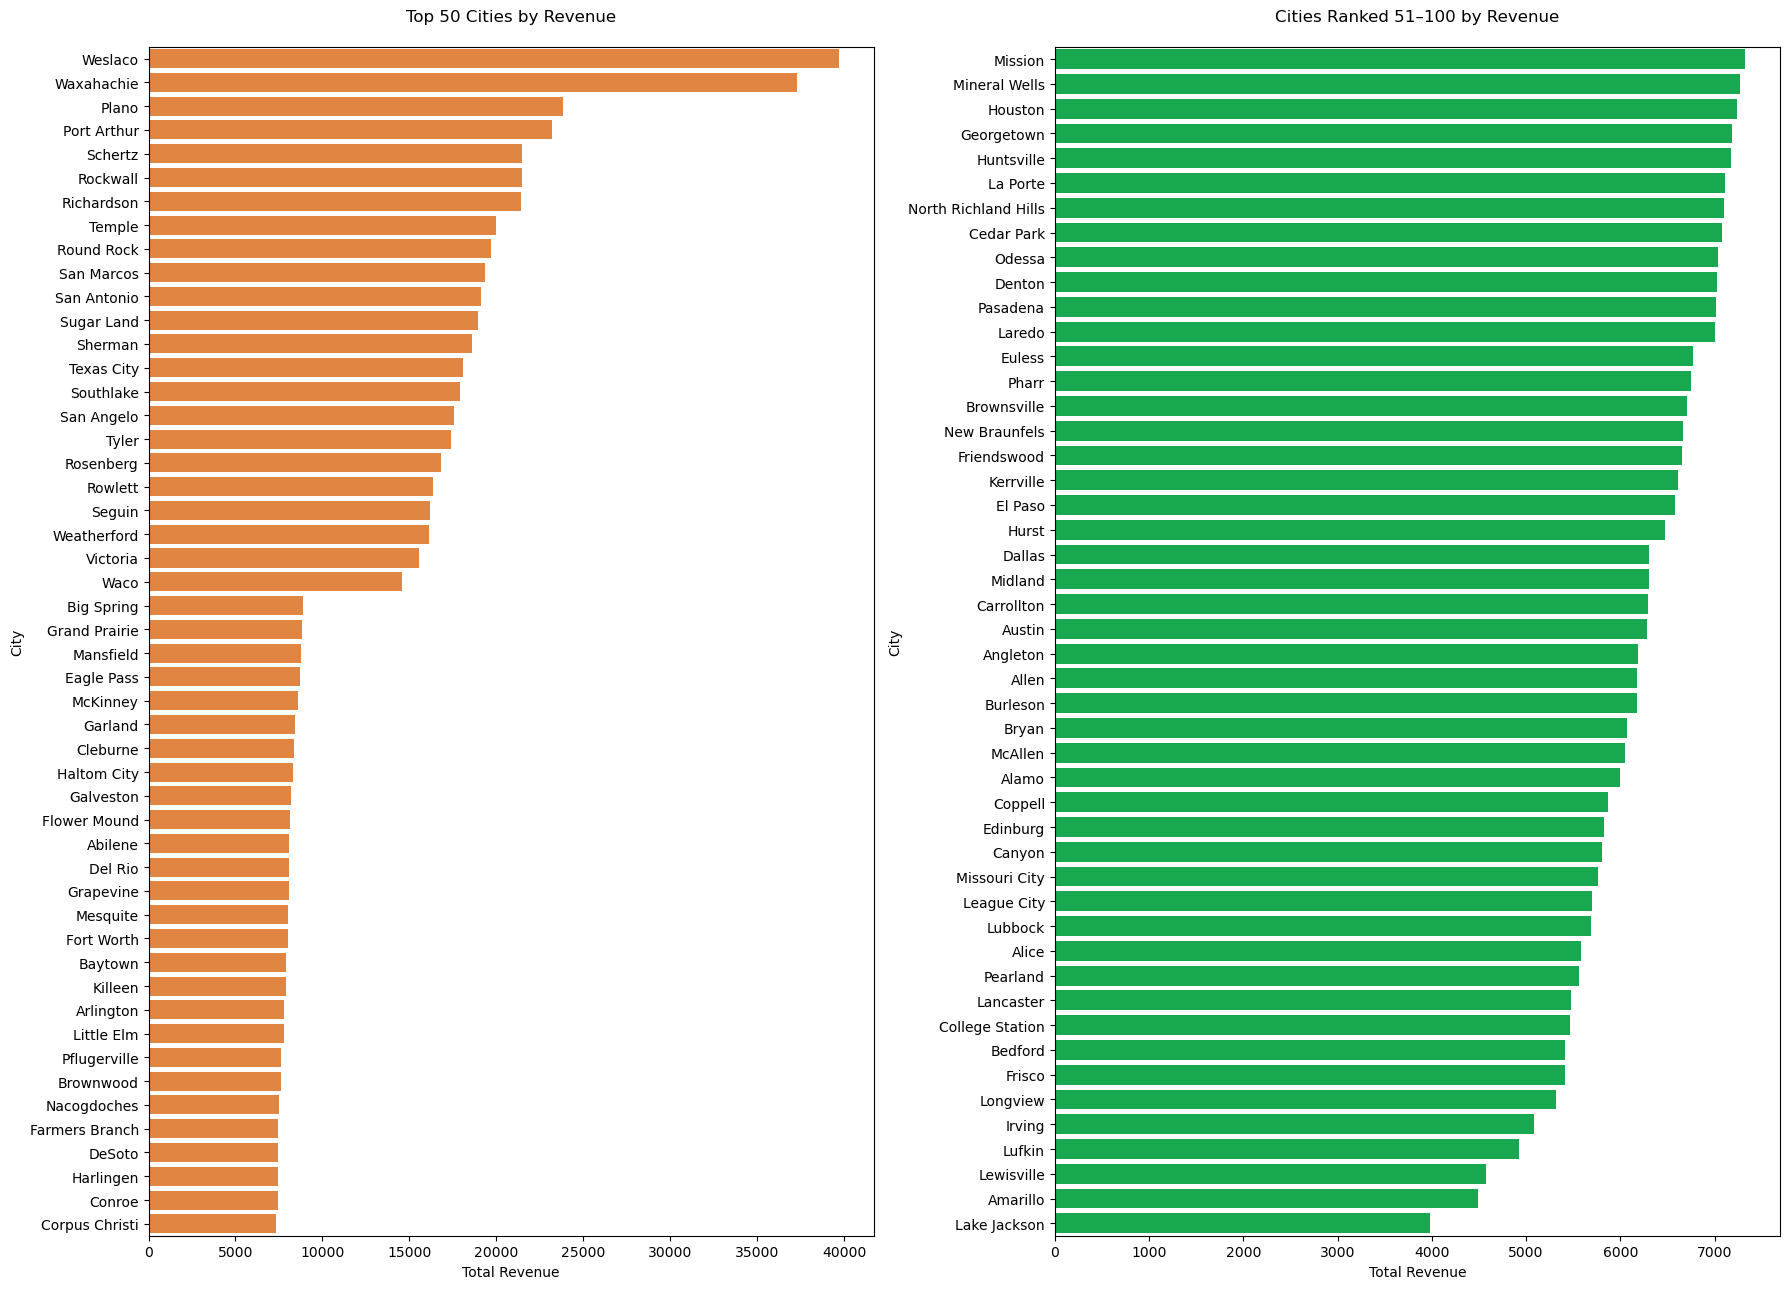

In [12]:
fig, ax = plt.subplots(1,2, figsize=(18, 13))

# Barplot for sales by top 50 cities
sns.barplot(data = city_sales_perform_batch1, x = 'total_amount', y = 'City', color = '#fa8128', ax = ax[0])
ax[0].set_title("Top 50 Cities by Revenue\n")
ax[0].set_xlabel("Total Revenue")
plt.tight_layout()

# Barplot for sales by 51-100 cities
sns.barplot(data = city_sales_perform_batch2, x = 'total_amount', y = 'City', color = '#00c04b', ax = ax[1])
ax[1].set_title("Cities Ranked 51–100 by Revenue\n")
ax[1].set_xlabel("Total Revenue")
plt.tight_layout()
plt.show()

In [13]:
# Sales performance data by hour and payment_method
df_sales = df[['payment_method','total_amount','datetime']]
df_sales.head(2)

,payment_method,total_amount,datetime
0,Cash,76.40,2008-03-19 10:29:00
1,Credit card,72.52,2010-01-19 17:15:00


In [14]:
df_sales['hour'] = df['datetime'].dt.hour
hour_payment_perform = df_sales.groupby(['hour', 'payment_method'])['total_amount'].sum().reset_index()
hour_payment_perform.head(2)

,hour,payment_method,total_amount
0,6,Cash,11798.0
1,6,Credit card,4703.0


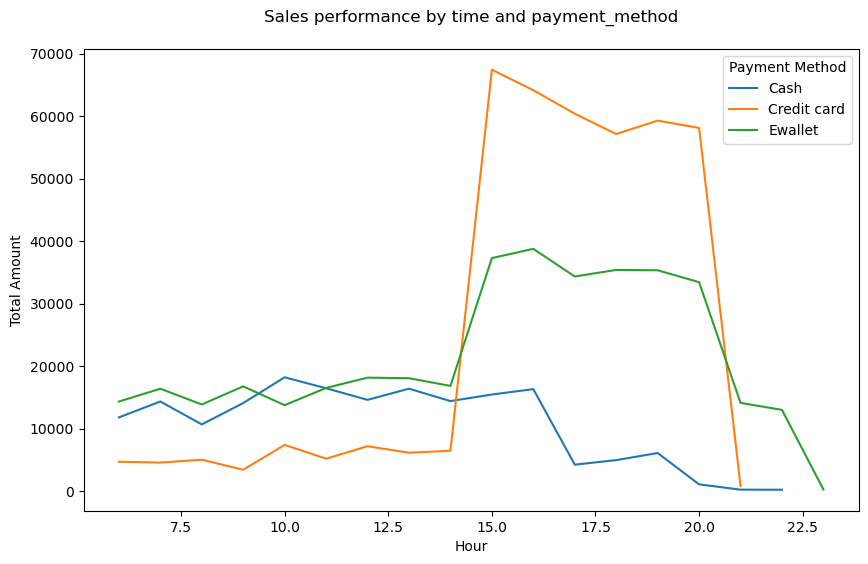

In [15]:
fig, ax = plt.subplots(1,1, figsize = (10,6))
sns.lineplot(data = hour_payment_perform, x ='hour', y = 'total_amount', hue = 'payment_method', ax = ax)
plt.title("Sales performance by time and payment_method\n")
plt.xlabel("Hour")
plt.ylabel("Total Amount")
plt.legend(title = "Payment Method")
plt.show()

#### Peak sales-period and customer buying pattern

In [16]:
# Data for sales period and buying pattern
df_sales['day_of_week'] = df_sales['datetime'].dt.day_name()
buying_trend = df_sales.pivot_table(
    values='total_amount',  # column(in dataset) where aggregation is applied
    index='hour',           # rows
    columns= 'day_of_week', # columns
    aggfunc='sum'           # aggregation function
)
# Making day_of_week in Week order
buying_trend = buying_trend.reindex(columns=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
)
buying_trend.head()

day_of_week,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday
hour,,,,,,,
6,4932.0,4578.00,3963.00,5050.00,4506.0,3477.00,4333.00
7,5249.0,4496.00,5679.00,4212.00,5074.0,3966.00,6649.00
8,4364.0,3866.00,3382.00,4499.00,4456.0,3661.00,5363.00
9,4613.0,3558.00,5888.00,5458.00,4040.0,5711.00,5027.00
10,4561.0,4733.94,5615.03,6499.23,6709.9,5362.46,5898.85


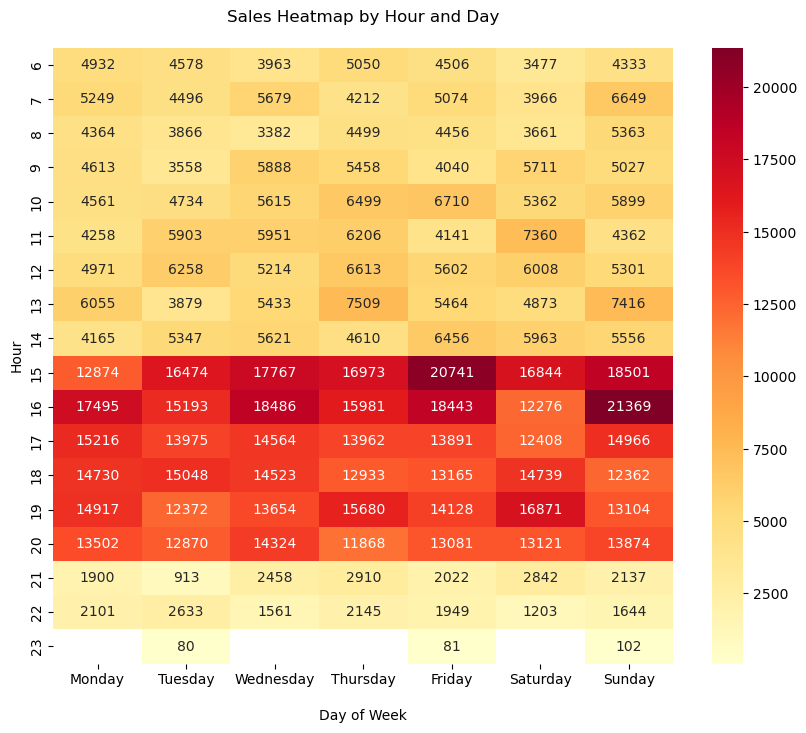

In [17]:
fig, ax = plt.subplots(1,1, figsize = (10,8))
sns.heatmap(buying_trend, annot=True, fmt='.0f', cmap='YlOrRd', ax = ax)
plt.title("Sales Heatmap by Hour and Day\n")
plt.xlabel("\nDay of Week")
plt.ylabel("Hour")
plt.show()

#### Profit Margin anaylis by Branch and Category

In [18]:
# Profit of branches in different categories data
branch_category_profit = df.pivot_table(
    values='profit_margin', # column(in dataset) where aggregation is to be applied
    index='Branch',         # rows
    columns='category',     # columns
    aggfunc='sum'           # aggregation function
)
branch_category_profit.head()

category,Electronic accessories,Fashion accessories,Food and beverages,Health and beauty,Home and lifestyle,Sports and travel
Branch,,,,,,
WALM001,0.36,11.88,NaN,NaN,12.24,0.36
WALM002,0.72,10.08,0.72,NaN,10.44,NaN
WALM003,6.24,39.36,0.96,NaN,34.80,0.36
WALM004,NaN,13.44,0.48,0.48,12.48,NaN
WALM005,0.48,17.28,0.96,0.48,17.28,NaN


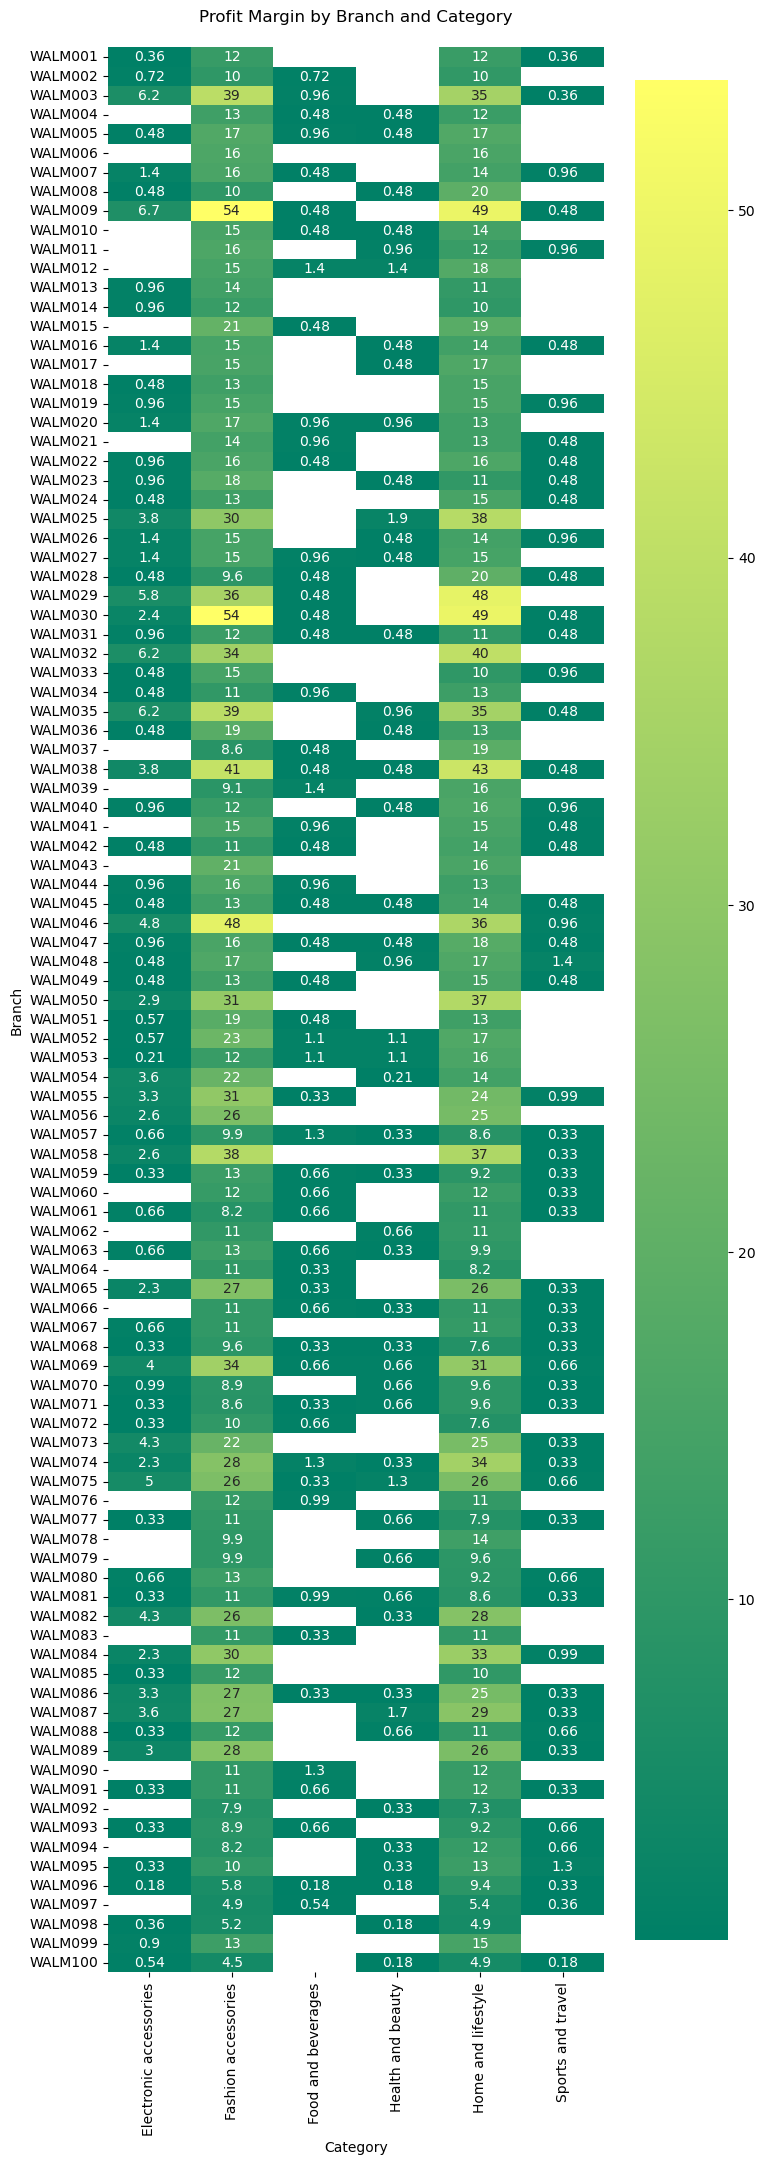

In [19]:
fig, ax = plt.subplots(1,1, figsize=(8, 25))
sns.heatmap(branch_category_profit, annot=True, cmap='summer', ax = ax)
plt.title("Profit Margin by Branch and Category\n")
plt.xlabel("Category")
plt.show()